# Lecture 1: Populations and Sampling

## High-Level Goals of this Course

- Build a solid foundational understanding of frequentist Statistical Inference (computational and classical!).
- Become competent using `R` to perform computation for frequentist Statistical Inference.

## Today's Learning Goals

By the end of this lecture, you should be able to:

1. Describe real-world examples of different types of data questions.
2. Name common population parameters to be estimated with sample data.
3. Define basic statistical terms related to inference.
4. Explain random and representative sampling.
5. Compare and contrast population distribution, sample distribution, and an estimator's sampling distribution.
6. Explain the concept of sampling distribution along with its properties and purpose.
7. Use `infer::rep_sample_n()` to perform repeated sampling.

## 1. What is Statistical Inference?

Statistical inference is the process of using sample data to make conclusions about the underlying population the sample came from. We can have these types of inference: **estimation** and **hypothesis testing**.

### 1.1. Landscape of Statistical Questions    

```{figure} img/what_is_the_question.png
:height: 500px
:name: question

Flowchart from [Peng and Leek (2015)](https://science.sciencemag.org/content/347/6228/1314.summary).
```

#### 1.1.1. Descriptive

This question seeks to summarize a characteristic of a set of data. There is no interpretation of the result itself as the result is a fact, an attribute of the data set you are working with.

##### Examples:

- What is the frequency of bacterial illnesses in a set of data collected from a group of individuals?
- How many people live in each US state?

#### 1.1.2. Exploratory

In this class of question, we analyze the data to see if there are patterns, trends, or relationships between variables **in a set of data**.

##### Examples:

- Do diets rich in certain foods have differing frequencies of bacterial illnesses **in a set of data** collected from a group of individuals? 
- Does air pollution correlate with life expectancy **in a set of data** collected from groups of individuals from several regions in the United States?  

#### 1.1.3. Inferential

In this class of question, we analyze the data to see if there are patterns, trends, or relationships between variables in a **representative sample**. We want to quantify how much is applicable to all individuals units in the population.


```{important}
This process implies estimation along with its associated randomness!
```

##### Examples:

- Is eating at least five servings a day of fresh fruit and vegetables **associated** with fewer bacterial illnesses per year?
- Is the gestational length of first born babies the same as that of non-first borns?

#### 1.1.4. Predictive

For this class of question we are trying to predict measurements or labels for individuals (people or things). We are less interested in what causes the predicted outcome, just what predicts it.

```{attention}
We are less concerned on whether there is a significant association or causation (statistically speaking!) between the response and covariates.
```

##### Examples: 

- How many viral illnesses will someone have next year?
- What political party will someone vote for in the next US election?

#### 1.1.5. Causal

This class asks about whether changing one factor will change another factor, on average, in a population. Sometimes the underlying design of the data collection, by default, allows the question to be causal (e.g., **randomized experiment** or a **proper observational study**).

##### Examples:

- Does eating at least 5 servings a day of fresh fruit and vegetables **cause** fewer bacterial illnesses per year?
- Does smoking **lead** to cancer?

#### 1.1.6. Mechanistic

This question tries to explain the underlying mechanism of the observed patterns, trends, or relationship (how does it happen?).

##### Examples:

- How do changes in diet lead to a reduction in the number of bacterial illnesses?
- How does how airplane wing design changes air flow over a wing, leading to decreased drag?

### 1.2. Types of Statistical Questions (and where you will approach them in MDS-V)

1. Descriptive (DSCI 511, 523, 531, 532).
2. Exploratory (DSCI 531, 532, 563).
3. **Inferential** (DSCI **552**, **561**, **562**, **553**, 574).
4. Predictive (DSCI 571, 572, 573, 574, 575).
5. **Causal** (DSCI **554**).
6. Mechanistic (not in MDS).

## 2. Things we can do with Statistical Inference...

**Make a statement such as:**

"*Based on a the results of the latest poll, we estimate that 47.2% of Americans think that firearms should have strong regulations or restrictions when thinking about gun ownership rights and gun laws.*"

**Source:** [Track American public opinion with the Reuters/Ipsos poll.](http://polling.reuters.com/#!response/PV20/type/smallest/dates/20180505-20181002/collapsed/true)

```{attention}
This is estimation!
```

### 2.1. Let us image the following...

A mayor election is coming up next summer in Mexico City, and you are a famous national pollster. There are two candidates: **A** and **B**.
<center>
    <img src="https://media.giphy.com/media/26xBMNOQjSdNTWgsU/giphy.gif" width="500" height="300"/>
    <div style="text-align: center"><i>Image from <a href="https://media.giphy.com/media/26xBMNOQjSdNTWgsU/giphy.gif">giphy.com</i></a></div>
    <br>
</center>

You want to **estimate** the proportion of votes each candidate will obtain in this election. Hence, you decide to conduct a poll on Facebook via my fan page with $n = 100,000$ respondents.

<center>
    <img src="https://media.giphy.com/media/3xz2BLHPfdkbJXniM0/giphy.gif" width="200" height="200"/>
    <div style="text-align: center"><i>Image from <a href="https://media.giphy.com/media/3xz2BLHPfdkbJXniM0/giphy.gif">giphy.com</i></a></div>
    <br>
</center>

**What are the results of this Facebook poll?**

Your poll **estimates** that candidate **B** will get most of the votes. You show these results to the media, claiming they are 100% accurate and unbiased.

### 2.2. Is this poll statistically correct? Why or why not?

**Your electoral poll is wrong in so many statistical levels!**

Your are not properly defining your population of interest. This definition is key before conducting any statistical study.

```{important}
In this example, our population of interest is: "all Mexico City's eligible citizens to vote in the upcoming election."
```

Once we have defined our population of interest, then we can start thinking about our random sample. Moreover, conducting a poll **on Facebook** will end up in biased and inaccurate results (even if the sample size is large!).

```{attention}
By collecting a sample from Facebook, we are at stake of including individuals **NOT** eligible to vote in Mexico City and excluding others without access to this social network (who might be eligible).
```

A proper sampling method is also key in inferential inquiries, as well as in others such as causal. Note there are different methods of sampling:

- Simple random sampling.
- Systematic sampling.
- Stratified sampling.
- Clustered sampling.
- Etc.

```{important}
To correct this study: how about a door-to-door poll with clustered sampling in this case?
```

Note this example has a level of uncertainty associated to estimation or hypothesis testing, which is also taken into account.

```{admonition} Note
:class: warning
Sampling techniques are out of the scope of this lecture, course, and MDS in general. If you want to get deeper information on sampling techniques, [Lohr (2021)](https://www.taylorfrancis.com/books/mono/10.1201/9780429298899/sampling-sharon-lohr) is a must-read for different sampling techniques. 
```

## 3. How Do We Perform Estimation?

1. Define the population of interest.
2. Select the right sampling method according to the specific characteristics of our population of interest.
3. Select our sample size (**Power Analysis**).
4. Collect the sampled data.
5. Measure and calculate the sample statistic.
6. Infer the population value based on this sample statistic while accounting for sampling uncertainty.

## 4. The Airbnb Dataset

Let us experiment and see how well sample estimates reflect the true population parameter we are interested in knowing!

What if we are interested in a population proportion? Nonetheless, we cannot run a census. Hence, what if we decide to collect a sample to estimate this proportion? How accurate would it be? How would the sampling variability look like?

A traveller visiting Vancouver may wish to know how diverse the lodging offer is in **Airbnb** regarding the room type. Mainly, the traveller is interested in the population proportion corresponding to those `listings` involving the *entire home/apartment*.

For the sake of this exercise, we will use data from [Inside Airbnb](http://insideAirbnb.com/). The data set contains **Airbnb** `listings` for Vancouver during September 2020.

```{attention}
Let us imagine (for learning purposes) that our data set represents the population of **ALL Airbnb** rental `listings` in Vancouver.
```

Moreover, the traveller does not have access to this dataset to compute this population proportion. Therefore, it will be necessary to perform a parameter estimation via sampling **since a census would be unfeasible**.

### 4.1. Loading `R` Packages

First off, let us load the libraries for data wrangling, analysis, and plotting.

In [2]:
library(tidyverse)
library(infer)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 4.2. Loading the Population Data Set

The data set `listings` contains an `id` number, neighbourhood, type of room, the number of people the rental accommodates, number of bathrooms, bedrooms, beds, and the price per night. We will only select the columns corresponding `id` and `room_type`.

In [3]:
listings <- read_csv("data/listings.csv")

Rows: 4938 Columns: 74
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (24): listing_url, name, description, neighborhood_overview, picture_ur...
dbl  (37): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl   (8): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (5): last_scraped, host_since, calendar_last_scraped, first_review, la...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
listings <- listings |>
  select(id, room_type)
listings

id,room_type
<dbl>,<chr>
10080,Entire home/apt
13357,Entire home/apt
13358,Entire home/apt
13490,Entire home/apt
⋮,⋮
45396342,Private room
45398550,Private room
45400161,Entire home/apt
45401776,Entire home/apt


### 4.3. Parameters and Estimates

As we already discussed in **DSCI 551**, in Statistics during our [**maximum likelihood estimation (MLE) lecture**](https://pages.github.ubc.ca/mds-2024-25/DSCI_551_stat-prob-dsci_students/notes/07_lecture-maximum-likelihood-estimation.html#estimating-true-parameters), we have true (and unknown!) population parameters that we aim to estimate via our observed random sample. For instance:

- $p_E$ is the **population proportion** for elements belonging to **class E (e.g., `Entire home/apt` in population data `listings`)**.
- $\mu$ (i.e., a Greek letter) usually denotes a **continuous population mean**.

On the other hand, the above parameter notation **with a hat** indicates estimates, i.e., they were derived from a **sample drawn from the population**:

- $\hat{p}_E$  is an estimate -- it is the sample proportion for elements belonging to **class E**.
- $\hat{\mu}$ is an estimate -- it is the sample mean.

In this **Airbnb** example, our parameter of interest is the proportion of `listings` that correspond to `Entire home/apt` in column `room_type`.

To make this clear, we will write $p_E$ when referring to this **population parameter**. Similarly, we will use $\hat{p}_E$ when referring to its corresponding **estimate**.

### 4.4. Random Variables

We set up random variables to map outcomes of a random process (e.g., flipping a coin, rolling a dice, etc.) to numbers. Random variables are denoted by upper case letters: $X$, $Y$, $Z$, etc.

```{attention}
Our random variables should map onto our columns in a data frame when doing statistical analysis.
```

Let us define an $i$th [Bernoulli-type](https://pages.github.ubc.ca/mds-2024-25/DSCI_551_stat-prob-dsci_students/notes/appendix-dist-cheatsheet.html#bernoulli) random variable as follows:

$$
X_i =
\begin{cases}
1 \; \; \; \; \text{if the listing is an entire home or apartment},\\
0 \; \; \; \; \mbox{otherwise}.
\end{cases}
$$

### 4.5. What is the Population Proportion $p_E$?

Recall that `listings` contains the population of $4,938$ elements (i.e, the number of rows in the data frame). Hence, for the sake of our estimation exercise, let us compute the **population parameter** $p_E$. 

In [5]:
listings |>
  group_by(room_type) |>
  summarise(n = n()) |>
  mutate(freq = round(n / sum(n), 3))

room_type,n,freq
<chr>,<int>,<dbl>
Entire home/apt,3731,0.756
Hotel room,4,0.001
Private room,1179,0.239
Shared room,24,0.005


```{attention}
We can see that $p_E = 0.756$.
```

### 4.6. Drawing a First Sample of size $n = 40$

Assume that the traveller does not have access to the population in `listings`. Let us simulate taking one random sample from this population. We will use the `rep_sample_n()` function from the `infer` package.

In [6]:
set.seed(552) # For reproducibility, since this a simulation exercise for learning purposes.
sample_1 <- rep_sample_n(listings, size = 40) # Sampling WITHOUT replacement is the default
sample_1

replicate,id,room_type
<int>,<dbl>,<chr>
1,28390229,Entire home/apt
1,26356375,Entire home/apt
1,43480074,Entire home/apt
1,25168981,Private room
⋮,⋮,⋮
1,29462569,Entire home/apt
1,19894347,Entire home/apt
1,31864754,Entire home/apt
1,26308916,Entire home/apt


We can compute $\hat{p}_E$ coming from `sample_1`:

In [7]:
sample_1 |>
  group_by(room_type) |>
  summarise(n = n()) |>
  mutate(freq = round(n / sum(n), 3))

room_type,n,freq
<chr>,<int>,<dbl>
Entire home/apt,32,0.8
Private room,8,0.2


Hence,

$$\hat{p}_E = 0.8.$$

### 4.7. Statistical Clarification

We already defined our Bernoulli-type random variable $X_i$ (for $i = 1, \dots, n$). Note the following:

$$\hat{p}_E = \frac{X_1 + X_2 + \ldots + X_n}{n}.$$

```{important}
An expression such as the one above is called an **estimator**, given it contains random variables. Once you have **realizations** (i.e., actual observed numbers) of these random variables, the estimator becomes an **estimate**.
```

Therefore, $\hat{p}_E$ is also a random variable! This means that $\hat{p}_E$ will vary from sample to sample.

### 4.8. Drawing a Second Sample of size $n = 40$

In [8]:
set.seed(123) # For reproducibility.
sample_2 <- rep_sample_n(listings, size = 40)
sample_2

replicate,id,room_type
<int>,<dbl>,<chr>
1,29838522,Private room
1,30238086,Entire home/apt
1,27576210,Entire home/apt
1,7026181,Private room
⋮,⋮,⋮
1,1678734,Entire home/apt
1,2326272,Entire home/apt
1,19144132,Entire home/apt
1,31758873,Entire home/apt


In [9]:
sample_2 |>
  group_by(room_type) |>
  summarise(n_type = n()) |>
  mutate(freq = round(n_type / sum(n_type), 3))

room_type,n_type,freq
<chr>,<int>,<dbl>
Entire home/apt,31,0.775
Private room,9,0.225


Thus,

$$\hat{p}_E = 0.775.$$

### 4.9. Sampling Distributions


Our estimates $\hat{p}_E$ from `sample_1` and `sample_2` are different. This is due to **sampling variation** that occurs when taking a random sample.

Which of the two estimates is correct, $0.8$ or $0.775$? Well, both are! However, this tells us that reporting just a single number for an estimate is not enough.

We would like to also report, along with the estimate from our sample, some plausible range our estimate should fall in (i.e., the range we would expect almost any estimate from our population to fall in). How can we create such a range? It depends on two things:

- the distribution of the observations in our population, and
- how large the sample is.

We can get a proxy of the first from our sample (the sample distribution is really an estimate of the population distribution), and we know our sample size $n$!

Let us use simulation to learn how these things change the estimates we derive from sampling the population. To do this, we will construct and visualize a distribution of many estimates, calculated from many samples from our population. This special distribution is called the **sampling distribution** of our estimate. 

```{attention} 
We can do this for any estimator. Here, we will continue to work with a proportion, but in `lab1` you will also work with a **continuous mean**. Other estimators (such as the median, variance, correlation coefficient, etc.) also have sampling distributions. 
```

### 4.10. Drawing $10,000$ samples of size $n = 40$

Let us take $10,000$ random samples, and then look at the distribution of the proportions $\hat{p}_E$ (or the sampling distribution of the sample proportions) for samples of size $n = 40$.

To do this, first we use `rep_sample_n()` as previously, but we will add the `reps` argument. We will end up with $10,000$ different replicates.

In [10]:
set.seed(552) # For reproducibility.
samples_10000 <- rep_sample_n(listings, size = 40, reps = 10000)
samples_10000

replicate,id,room_type
<int>,<dbl>,<chr>
1,28390229,Entire home/apt
1,26356375,Entire home/apt
1,43480074,Entire home/apt
1,25168981,Private room
⋮,⋮,⋮
10000,32108967,Entire home/apt
10000,15096629,Entire home/apt
10000,27759917,Private room
10000,45255958,Private room


This gives us 10000 random samples of size $n = 40$ from the population (`listings`). You can explore the `replicate` column and the `id` column to prove that to yourself.

### 4.11. What is the $\hat{p}_E$ in each of our $10,000$ samples?

Firstly, we create a `group_by()` attribute for the `replicate` column our data frame `samples_10000`. 

Then, we can apply the `summarise()` function to each replicate to count the total number of listings that are of `room_type` `Entire home/apt` for each sample and calculate the proportion.

In [11]:
sampling_dist <- samples_10000 |>
  group_by(replicate) |>
  summarise(
    n_E = sum(room_type == "Entire home/apt"),
    p_hat_E = sum(room_type == "Entire home/apt") / 40
  )
sampling_dist

replicate,n_E,p_hat_E
<int>,<int>,<dbl>
1,32,0.80
2,30,0.75
3,30,0.75
4,28,0.70
⋮,⋮,⋮
9997,35,0.875
9998,34,0.850
9999,30,0.750
10000,26,0.650


Let us calculate the mean $\bar{\hat{p}}_E$ of the 10,000 sample estimates:

In [12]:
mean_sampling_dist <- sampling_dist |>
    pull(p_hat_E)|>
    mean() |>
    round(3)
mean_sampling_dist

[1] 0.756

### 4.12. Plotting the Distribution of Sample Proportions

Set up plot size in Jupyter:

In [13]:
# Setting up plot width and height.
options(repr.plot.width = 15, repr.plot.height = 7)

Let us plot a histogram of the sample proportions in `sampling_dist` by specifying:

- `x` is the column of values to count for our histogram.
- `geom_histogram()` specifies that we would like to use a special kind of bar chart -- a histogram.
- `binwidth = 0.025` sets how wide the interval should be for counting values in the histogram.
- `xlab` labels the $x$-axis for the values being counted.
- `ggtitle()` adds a title to the plot.

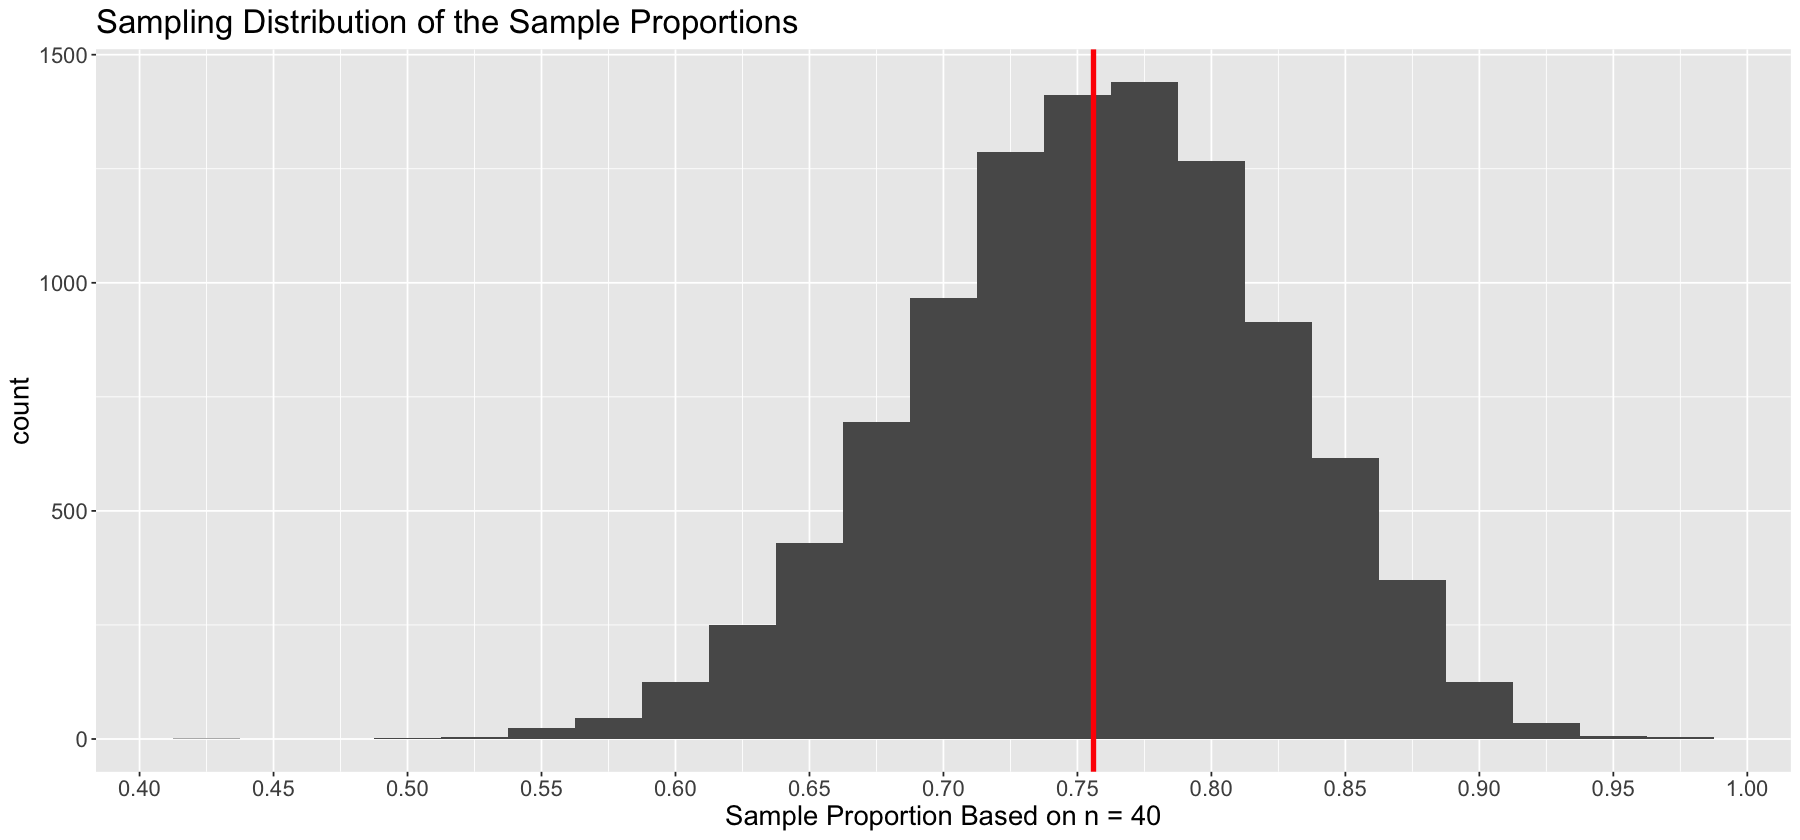

In [16]:
sampling_dist_plot <- sampling_dist |>
  ggplot(aes(x = p_hat_E)) +
  geom_histogram(binwidth = 0.025) +
  xlab("Sample Proportion Based on n = 40") +
  ggtitle("Sampling Distribution of the Sample Proportions") +
  theme(text = element_text(size = 16.5)) +
  scale_x_continuous(breaks = seq(0.4, 1, 0.05)) +
  geom_vline(xintercept = 0.756, color = "red", size = 1.5) # Mean proportion estimate as a vertical red line
sampling_dist_plot

**What do we notice here?**

We see that this sampling distribution of the sample proportions:

- has values ranging from ~0.425 to ~0.975.
- is centered near 0.756.
- is roughly symmetrical, and bell shaped (almost looking like a normal distribution).

Finally, recall that the population parameter from `listings` is 

$$p_E = 0.756.$$

Which is equal to the mean $\bar{\hat{p}}_E$ of the 10,000 sample estimates:

In [17]:
mean_sampling_dist

[1] 0.756

There is no magic here, we can use **the so-called expected value properties**. In our population of `listings`, we have the $i$th Bernoulli-type random variable:

$$
X_i =
\begin{cases}
1 \; \; \; \; \text{if the listing is an entire home or apartment},\\
0 \; \; \; \; \mbox{otherwise}.
\end{cases}
$$

$$X_i \sim \text{Bernoulli}(p_E)$$

$$\mathbb{E}(X_i) = p_E$$

Suppose we have a traditional **random sample** of $n$ independent and identically distributed (*iid*) $X_1, \dots, X_n$. We define

$$\hat{p}_E = \frac{\sum_{i = 1}^n X_i}{n}$$

```{math}
\begin{align*}
\mathbb{E}(\hat{p}_E) &= \mathbb{E} \left( \frac{\sum_{i = 1}^n X_i}{n} \right) \\
&= \frac{1}{n}\sum_{i = 1}^n \mathbb{E}(X_i) \\
&= p_E.
\end{align*}
```

**Theoretically**, the expected value of a **single $\hat{p}_E$** is equal to the population parameter $p_E$.

Now, suppose you draw $m$ random samples from the population listings ($m = 10000$ in our simulation). Hence, the mean $\bar{\hat{p}}_E$ of the $m$ sample estimates is

$$\bar{\hat{p}}_E = \frac{\sum_{j = 1}^m \hat{p}_{E_j}}{m}$$

```{math}
\begin{align*}
\mathbb{E}(\bar{\hat{p}}_E) &= \mathbb{E} \left( \frac{\sum_{j = 1}^m \hat{p}_{E_j}}{m} \right) \\
&= \frac{1}{m} \sum_{j = 1}^m \mathbb{E} \left( \hat{p}_{E_j} \right) \\
&= p_E.
\end{align*}
```

Again, **theoretically**, the expected value of the mean $\bar{\hat{p}}_E$ of the $m$ sample estimates is also equal to the population parameter $p_E$.

## 5. Wrapping up! 

What did we learn today?

- What are the different kinds of statistical questions we can ask?
- What is estimation, and why is it useful?
- How sampling can be useful for estimating?

## 6. Further Questions

Usually we only have one sample. So, what can we do? This is coming up in our second lecture.

## 7. Acknowledgements

- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim
- [Data Science in a box](https://github.com/rstudio-education/datascience-box) by Mine Cetinkaya-Rundel
- [Inference in 3 hours](https://github.com/AllenDowney/CompStats) by Allan Downey